In [48]:
import os
from keras.preprocessing.image import ImageDataGenerator


rootPath = "./datasets/cat-and-dog"

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'training_set'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    #os.path.join(rootPath, 'test_set'),
    os.path.join(rootPath, 'training_set'),
    target_size=(64, 64),
    subset='validation'
)

#모델생성
from keras.models import Sequential
from keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))   #이미지 크기 64x64 , 색상을 갖고있기때문에 3(red,green blue)

model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc'],
)

#체크포인트 콜백 사용
import tensorflow as tf
from keras.callbacks import  EarlyStopping

model_dir = './log'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = model_dir + "/dog_cat.model"

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20)


history=model.fit_generator(
    trainGen,
    epochs=50,
    steps_per_epoch=trainGen.samples/40,
    validation_data=validationGen,
    validation_steps=trainGen.samples/40,
    callbacks=[checkpoint,early_stopping]
)


model.save_weights('dog_cat_4layer.h5')

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_186 (Conv2D)          (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_187 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_139 (MaxPoolin (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_140 (MaxPoolin (None, 8, 8, 256)         0         
___________________________________________________________

181/180 [==============================] - 36s 199ms/step - loss: 0.4268 - acc: 0.7978 - val_loss: 0.4365 - val_acc: 0.7976
Epoch 00032: val_loss did not improve
Epoch 33/50
181/180 [==============================] - 36s 198ms/step - loss: 0.4302 - acc: 0.8010 - val_loss: 0.4340 - val_acc: 0.7970
Epoch 00033: val_loss did not improve
Epoch 34/50
181/180 [==============================] - 36s 200ms/step - loss: 0.4258 - acc: 0.8113 - val_loss: 0.4254 - val_acc: 0.7997
Epoch 00034: val_loss improved from 0.43052 to 0.42543, saving model to ./log/dog_cat.model
Epoch 35/50
181/180 [==============================] - 36s 198ms/step - loss: 0.4125 - acc: 0.8053 - val_loss: 0.4296 - val_acc: 0.8070
Epoch 00035: val_loss did not improve
Epoch 36/50
181/180 [==============================] - 38s 213ms/step - loss: 0.4020 - acc: 0.8239 - val_loss: 0.4475 - val_acc: 0.7946
Epoch 00036: val_loss did not improve
Epoch 37/50
181/180 [==============================] - 36s 197ms/step - loss: 0.4097 - a

In [45]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'yo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'yo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

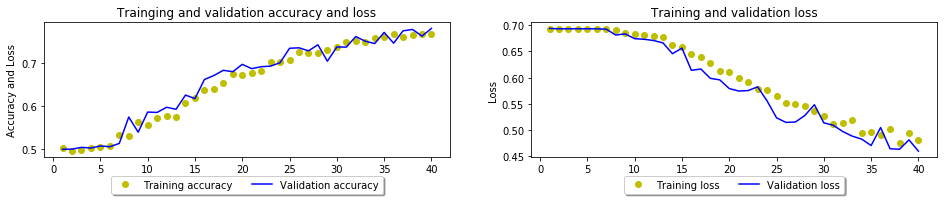

Found 2023 images belonging to 2 classes.


[0.4859715262322042, 0.7750865052787019]

In [46]:
model.save_weights('dog_cat_4layer.h5')

show_graph(history.history)


testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

예측: 개
정답: 개


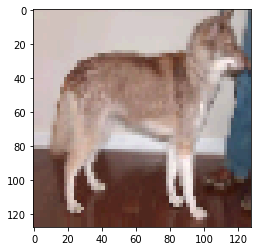

In [38]:
from keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))
